In [1]:
import tensorflow as tf

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [3]:
import numpy as np
import os
import sys
import func
import fnmatch
import time
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from params import dresden_images_root, train_csv_path, patch_span, \
        patch_num, patches_root, patches_db_path

In [4]:
# Define image and batch size
img_height = 256
img_width = 256
batch_size = 64

# Load and Compile the model
model = tf.keras.models.load_model('model.h5')

sgd = tf.keras.optimizers.SGD(lr=0.001, momentum=0.95, decay=0.0004)

model.compile(
    optimizer=sgd, 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

# Create the Generator
test_data_gen = ImageDataGenerator(preprocessing_function=None,
    rescale=1./255)

# Read the positive test samples.
test_generator = test_data_gen.flow_from_directory(
                  directory = r"./train/test/",
                  target_size=(img_width, img_height), color_mode='grayscale', shuffle=True,
                  batch_size=batch_size, class_mode="categorical")

print('\n# Evaluate on test data')
results = model.evaluate(test_generator)
print('test loss, test acc:', results)

Found 11775 images belonging to 3 classes.

# Evaluate on test data
184/184 [==============================] - 297s 2s/step - loss: 0.0033 - accuracy: 0.9993
test loss, test acc: [0.003281069430695128, 0.9993207]



It tooks 14 seconds

index are predictions, columns are ground truth



,Canon_Ixus70,Nikon_D200,Olympus_mju-1050SW
Canon_Ixus70,1431,0,0
Nikon_D200,2,1910,4
Olympus_mju-1050SW,0,0,3053


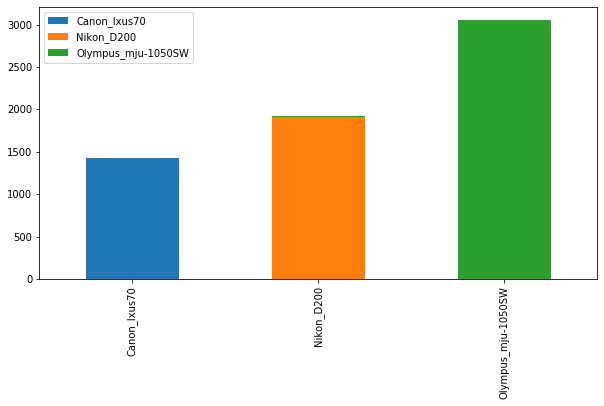

In [5]:
model_list = os.listdir(r'./train/test/')
# generate a histogram, which for every unseen models, how many imgs are classified.
hist, conf, labels = func.evaluate(model_list, test_generator, model, index=model_list, columns=model_list, title=None, num_batch=100)

The mean of the confidence is: 



,Canon_Ixus70,Nikon_D200,Olympus_mju-1050SW
labels,,,
0.0,0.999705,0.000199,0.000096
1.0,0.001691,0.995775,0.002534
2.0,0.000901,0.000391,0.998708


The standard deviation of the confidence is: 



,Canon_Ixus70,Nikon_D200,Olympus_mju-1050SW
labels,,,
0.0,0.002517,0.001941,0.001282
1.0,0.028431,0.052303,0.035043
2.0,0.015245,0.006955,0.017570


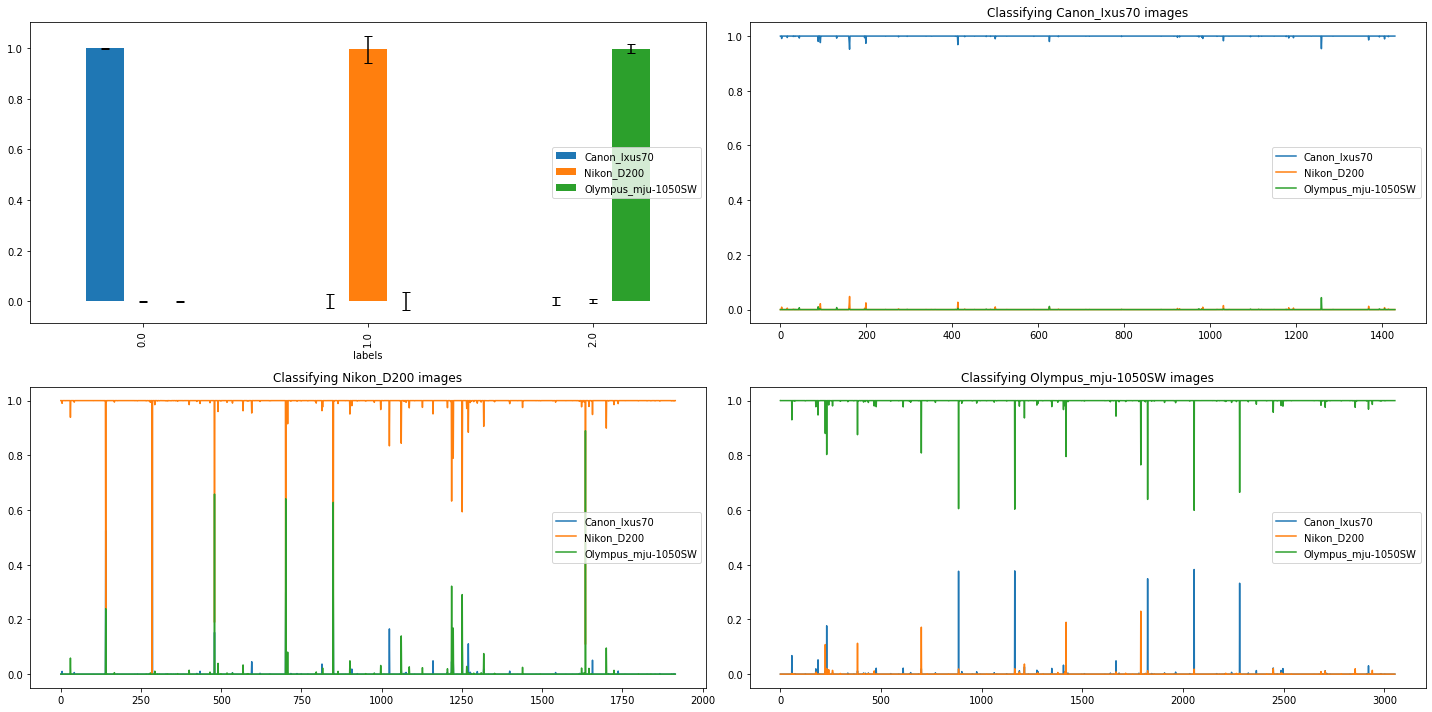

In [6]:
mean, error = func.mean_error(labels, conf, model_list)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
mean.plot.bar(yerr=error, ax=axes[0,0], capsize=4)

# for all the images' real label is a certain camera, for example Canon_Ixus70, 
# how does these images are classified ? The magnitude of the histogram indicate how
# sure is the model classified the image as one camera(show by color)
graph = {0:axes[0,1], 1:axes[1,0], 2:axes[1, 1]}

func.plot_conf(model_list, labels, conf, graph)